In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
data = fashion_mnist.load_data()

In [4]:
X_train, y_train, X_test, y_test = data[0][0],data[0][1], data[1][0], data[1][1]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# or easily
(X_train, y_train), (X_test, y_test) = data

(28, 28)


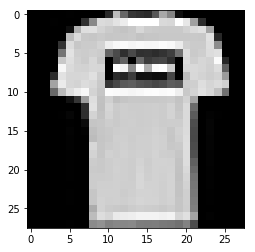

In [7]:
sample = X_train[1]
print(sample.shape)
plt.imshow(sample, cmap='gray')
# plt.imshow(sample)
plt.show()

In [8]:
X_train = X_train/255.
X_test = X_test/255.

In [9]:
# Defining model

model = keras.models.Sequential()

In [10]:
model.add(keras.layers.Flatten(input_shape=(28,28)))

In [11]:
model.add(keras.layers.Dense(128, activation=tf.nn.relu))

W0712 23:06:30.835551 140572390213440 deprecation.py:506] From /home/renjith/miniconda3/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# model.fit(X_train, y_train, epochs=5, validation_data=(X_train, y_train))

In [15]:
# model.evaluate(X_test, y_test)

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
#     print("*"*20)
#     print(logs)
    if(logs.get('acc')>.94):
        print("\nReached 95% accuracy so cancelling training!")
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.fit(X_train, y_train, epochs=50, callbacks=[callbacks])